# EdNet - PREDICT STUDENT PERFORMANCE
"EdNet is the dataset of all student-system interactions collected over 2 years by Santa, a multi-platform AI tutoring service with more than 780K users in Korea available through Android, iOS and web." https://github.com/riiid/ednet<p>
<b>OBJECTIVE:</b> Predict likelihood that a student will choose a correct answer based on their previous data. <p>
<b>METHOD:</b> Compare many machine learning logistic regression algorithms to determine the most performant model for the students.

In [1]:
# I get by with a little help from my friends
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
#cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-KT1/KT1_1

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
"""# save file locations as variables for fast access
prefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'
folder_1 = prefix + 'KT1/KT1_1/'
folder_2 = prefix + 'KT2/KT2/'
folder_3 = prefix + 'KT3/KT3/'
folder_4 = prefix + 'KT4/KT4/'
questions = prefix + 'Contents/contents/questions.csv'

# read in Answer Key as 'questions_df' csv file
questions_df = pd.read_csv(questions)

# create a list of the csv files in current directory
csv_files = glob.glob('*.csv')"""

"# save file locations as variables for fast access\nprefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'\nfolder_1 = prefix + 'KT1/KT1_1/'\nfolder_2 = prefix + 'KT2/KT2/'\nfolder_3 = prefix + 'KT3/KT3/'\nfolder_4 = prefix + 'KT4/KT4/'\nquestions = prefix + 'Contents/contents/questions.csv'\n\n# read in Answer Key as 'questions_df' csv file\nquestions_df = pd.read_csv(questions)\n\n# create a list of the csv files in current directory\ncsv_files = glob.glob('*.csv')"

In [5]:
"""extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]"""

"extension = 'csv'\nall_filenames = [i for i in glob.glob('*.{}'.format(extension))]"

In [6]:
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [7]:
#combined_csv.to_csv( "ednet_KT1.csv", index=False, encoding='utf-8-sig')

In [8]:
df = pd.read_csv('/content/gdrive/My Drive/ednet_KT1.csv')
df.shape

(4734092, 5)

In [9]:
"""# count of csv files in current directory
print(len(csv_files))"""

'# count of csv files in current directory\nprint(len(csv_files))'

# DATA WRANGLING & CLEANING
1. data import, read csv files as pandas dataframes
2. extract user_id from filename and assign user_id as value to column[0], 'user_id'
3. convert unix timestamps to datetime
4. drop duplicate timestamp rows
5. clean up some values by slicing unhelpful leading letters and convert into integers
6. export as a cleaned up csv

In [10]:
df.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time
0,1515947027887,1,q8098,b,21000
1,1515947053370,2,q8074,d,23000
2,1515947073884,3,q176,b,18000
3,1515947094677,4,q1279,c,18000
4,1515947174253,5,q2067,d,25666


In [11]:
# user number = z
z = 1850

# loop: create pandas dataframe
for i in range(1):
        #df = pd.read_csv('ednet_KT1.csv')
        #df = pd.read_csv(folder_1 + csv_files[z])
        #df = pd.read_csv(folder_1 + csv_files[z], parse_dates=True, index_col="timestamp")
        #df.insert(0, 'user_id', 'ednet_KT1')
        
        # convert timestamp column to datetime
        df.timestamp = pd.to_datetime(df['timestamp'], unit='ms')
        
        # drop_duplicates
        df = df.drop_duplicates(subset=['timestamp'], keep='last')
        
        # convert 'elapsed_time' from ms to seconds
        df.elapsed_time = df.elapsed_time.div(1000)
        
        # cleanup values by slicing the leading letter
        #df.user_id = df.user_id.str.split('u')[1][1]
        #df.user_id = df.user_id.astype('int64')
        
        #df = df.drop('user_id')
        
        df.question_id = df.question_id.str.slice(start=1)
        
        
        # EXPORT csv create a csv of the new dataframe
        output = 'ednet_KT1_sample.csv'
        df.to_csv(output , index=False)
        
        z+=1

df.shape

(4639692, 5)

In [12]:
"""# loop: create pandas dataframe
for i in range(1):
        df2 = pd.read_csv(folder_1 + csv_files[z])
        df2.insert(0, 'user_id', csv_files[z].split('.')[0])
        
        # convert timestamp column to datetime
        df2.timestamp = pd.to_datetime(df['timestamp'], unit='ms')
        
        # drop_duplicates
        df2 = df2.drop_duplicates(subset=['timestamp'], keep='last')
        
        # convert 'elapsed_time' from ms to seconds
        df2.elapsed_time = df2.elapsed_time.div(1000)
        
        # cleanup values by slicing the leading letter
        df2.user_id = df2.user_id.str.split('u')[1][1]
        df2.user_id = df2.user_id.astype('int64')
        df2.question_id = df2.question_id.str.slice(start=1)
        
        #df.question_id = df.question_id.fillna(0).astype(int)

        # EXPORT csv create a csv of the new dataframe
        output = '_KT1_'+ str(csv_files[z])
        df2.to_csv(output, index=False)
        
        z+=1

df2.head()"""

"# loop: create pandas dataframe\nfor i in range(1):\n        df2 = pd.read_csv(folder_1 + csv_files[z])\n        df2.insert(0, 'user_id', csv_files[z].split('.')[0])\n        \n        # convert timestamp column to datetime\n        df2.timestamp = pd.to_datetime(df['timestamp'], unit='ms')\n        \n        # drop_duplicates\n        df2 = df2.drop_duplicates(subset=['timestamp'], keep='last')\n        \n        # convert 'elapsed_time' from ms to seconds\n        df2.elapsed_time = df2.elapsed_time.div(1000)\n        \n        # cleanup values by slicing the leading letter\n        df2.user_id = df2.user_id.str.split('u')[1][1]\n        df2.user_id = df2.user_id.astype('int64')\n        df2.question_id = df2.question_id.str.slice(start=1)\n        \n        #df.question_id = df.question_id.fillna(0).astype(int)\n\n        # EXPORT csv create a csv of the new dataframe\n        output = '_KT1_'+ str(csv_files[z])\n        df2.to_csv(output, index=False)\n        \n        z+=1\n\ndf

In [13]:
"""# loop: create pandas dataframe
for idx, file in enumerate(csv_files):
        z = idx + z
        df = pd.read_csv(folder_1 + csv_files[z])
        df.insert(0, 'user_id', csv_files[z].split('.')[0])
        
        # convert timestamp column to datetime
        df.timestamp = pd.to_datetime(df['timestamp'], unit='ms')
        
        # drop_duplicates
        df = df.drop_duplicates(subset=['timestamp'], keep='last')
        
        # convert 'elapsed_time' from ms to seconds
        df.elapsed_time = df.elapsed_time.div(1000)
        
        # cleanup values by slicing the leading letter
        df.user_id = df.user_id.str.split('u')[1][1]
        df.user_id = df.user_id.astype('int64')
        df.question_id = df.question_id.str.slice(start=1)
        
        #df.question_id = df.question_id.fillna(0).astype(int)

        # EXPORT csv create a csv of the new dataframe
        output =  '_KT1_'+ str(csv_files[z])
        df.to_csv(output, index=False)
        
        z+=1

print(output)"""

"# loop: create pandas dataframe\nfor idx, file in enumerate(csv_files):\n        z = idx + z\n        df = pd.read_csv(folder_1 + csv_files[z])\n        df.insert(0, 'user_id', csv_files[z].split('.')[0])\n        \n        # convert timestamp column to datetime\n        df.timestamp = pd.to_datetime(df['timestamp'], unit='ms')\n        \n        # drop_duplicates\n        df = df.drop_duplicates(subset=['timestamp'], keep='last')\n        \n        # convert 'elapsed_time' from ms to seconds\n        df.elapsed_time = df.elapsed_time.div(1000)\n        \n        # cleanup values by slicing the leading letter\n        df.user_id = df.user_id.str.split('u')[1][1]\n        df.user_id = df.user_id.astype('int64')\n        df.question_id = df.question_id.str.slice(start=1)\n        \n        #df.question_id = df.question_id.fillna(0).astype(int)\n\n        # EXPORT csv create a csv of the new dataframe\n        output =  '_KT1_'+ str(csv_files[z])\n        df.to_csv(output, index=False)\n

# EXPLORATORY DATA ANALYSIS
1. check for null values
2. clean up as needed

[77103, 77103, 77103, 75965, 77103]


Text(0.5, 1.0, 'Non-Null Values')

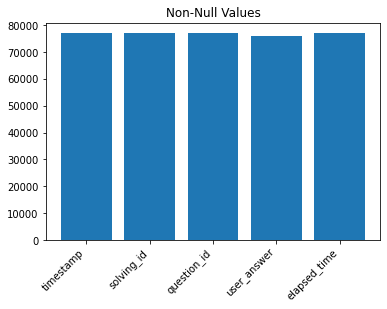

In [14]:
# plot Non-Null Values per column
#hey = '_KT1_u' + str(df.iloc[:,0].values[0])
newb = pd.read_csv('https://raw.githubusercontent.com/premonish/EdNet/master/data/processed/ednet_KT1_sample.csv')

newlist = []
for i in range(newb.shape[1]):
    newlist.append(newb.iloc[:,i].notnull().sum())
print(newlist)

import matplotlib.pyplot as plt
plt.bar(newb.columns, newlist)
plt.xticks(rotation=45, ha="right")
plt.title('Non-Null Values')

# DATA CLEANING, SPLITTING & MERGING
1. clean up unneeded leading letters in values
2. split the 'tags' column n times and make a separate column for each tag
3. left inner join student dataframe and answer key dataframe on the 'question_id' column 
4. grade the student against answer key and record in a binary 'correct' column 
5. remove duplicate 'timestamp' rows

In [15]:
# clean 'question_df' dataframe AKA: Answer Key
questions_df = pd.read_csv('https://raw.githubusercontent.com/premonish/EdNet/master/data/questions.csv')
questions_df.question_id = questions_df.question_id.str.slice(start=1)
questions_df.bundle_id = questions_df.bundle_id.str.slice(start=1)
questions_df.explanation_id = questions_df.explanation_id.str.slice(start=1)
questions_df.deployed_at = pd.to_datetime(questions_df.deployed_at, unit='ms')
dfq = questions_df[['question_id', 'correct_answer', 'bundle_id', 'part', 'tags', 'deployed_at']]
dfq.head()

,question_id,correct_answer,bundle_id,part,tags,deployed_at
0,1,b,1,1,1;2;179;181,2019-05-17 11:40:17.098
1,2,a,2,1,15;2;182,2019-05-17 11:40:19.720
2,3,b,3,1,14;2;179;183,2019-05-17 11:40:22.784
3,4,b,4,1,9;2;179;184,2019-05-17 11:40:25.357
4,5,c,5,1,8;2;179;181,2019-05-17 11:40:28.439


In [16]:
# new data frame with split value columns 
new = dfq['tags'].str.split(";", n = 8, expand = True) 
  
# make a separate column for each tag
dfq['tag1']= new[0] 
dfq['tag2']= new[1] 
dfq['tag3']= new[2]
dfq['tag4']= new[3]
dfq['tag5']= new[4]
dfq['tag6']= new[5]
dfq['tag7']= new[6]
#dfq['tag8']= new[7]

In [17]:
dfq.head()

,question_id,correct_answer,bundle_id,part,tags,deployed_at,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,1,b,1,1,1;2;179;181,2019-05-17 11:40:17.098,1,2,179,181,None,None,None
1,2,a,2,1,15;2;182,2019-05-17 11:40:19.720,15,2,182,None,None,None,None
2,3,b,3,1,14;2;179;183,2019-05-17 11:40:22.784,14,2,179,183,None,None,None
3,4,b,4,1,9;2;179;184,2019-05-17 11:40:25.357,9,2,179,184,None,None,None
4,5,c,5,1,8;2;179;181,2019-05-17 11:40:28.439,8,2,179,181,None,None,None


In [18]:
# subset df for notnull question_id rows only (only work with rows that have questions)
df2 = df[df['question_id'].notnull()]

In [19]:
# left join student dataframe and answer key dataframe on the 'question_id' column 
dfm = pd.merge(df2, dfq,  how='left', left_on=['question_id'], right_on = ['question_id'])

In [20]:
# create a 'correct' column
dfm['correct'] = 0
# dfm['correct'] = np.nan

# loop - if user answers == correct answer, then dfq['correct'][_]= 1
length_df = dfm.shape[0]
count = 0
for i in range(length_df):
    if dfm['user_answer'][count] == dfm['correct_answer'][count]:
        dfm['correct'][count] = 1
    #if dfm['user_answer'][count] != dfm['correct_answer'][count]:
    #    dfm['correct'][count] = 0
    count+=1

In [21]:
# inspect new merged dataframe
dfm.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,correct_answer,bundle_id,part,tags,deployed_at,tag1,tag2,tag3,tag4,tag5,tag6,tag7,correct
0,2018-01-14 16:23:47.887,1,8098,b,21.000,b,5569,1,5;2;182,2017-12-29 15:06:23.093,5,2,182,None,None,None,None,1
1,2018-01-14 16:24:13.370,2,8074,d,23.000,c,5545,1,11;7;183,2018-05-18 08:57:02.552,11,7,183,None,None,None,None,0
2,2018-01-14 16:24:33.884,3,176,b,18.000,d,176,1,6;7;183,2017-12-29 14:53:43.800,6,7,183,None,None,None,None,0
3,2018-01-14 16:24:54.677,4,1279,c,18.000,c,1279,2,24;26;182;184,2019-10-17 02:58:38.714,24,26,182,184,None,None,None,1
4,2018-01-14 16:26:14.253,5,2067,d,25.666,b,1623,3,52;183;184,2019-03-12 02:28:10.338,52,183,184,None,None,None,None,0


In [22]:
# organize columns into logical groups
dfm = dfm[['question_id','solving_id','bundle_id','correct','part',\
           'timestamp','deployed_at','elapsed_time','tag1','tag2','tag3','tag4','tag5','tag6','tag7']]

In [23]:
# inspect again
dfm.head()

,question_id,solving_id,bundle_id,correct,part,timestamp,deployed_at,elapsed_time,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,8098,1,5569,1,1,2018-01-14 16:23:47.887,2017-12-29 15:06:23.093,21.000,5,2,182,None,None,None,None
1,8074,2,5545,0,1,2018-01-14 16:24:13.370,2018-05-18 08:57:02.552,23.000,11,7,183,None,None,None,None
2,176,3,176,0,1,2018-01-14 16:24:33.884,2017-12-29 14:53:43.800,18.000,6,7,183,None,None,None,None
3,1279,4,1279,1,2,2018-01-14 16:24:54.677,2019-10-17 02:58:38.714,18.000,24,26,182,184,None,None,None
4,2067,5,1623,0,3,2018-01-14 16:26:14.253,2019-03-12 02:28:10.338,25.666,52,183,184,None,None,None,None


# PREPROCESSING
1. clean up any null values
2. coerce datatypes
3. split data into TRAIN & TEST sets

[4639692, 4639692, 4639692, 4639692, 4639692, 4639692, 4639692, 4639692, 4639692, 2439935, 2326156, 1181500, 379046, 62553, 24185]


Text(0.5, 1.0, 'Non-Null Values')

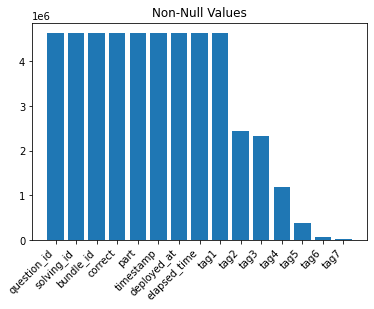

In [24]:
# plot non-null values
newlist = []
for i in range(dfm.shape[1]):
    newlist.append(dfm.iloc[:,i].notnull().sum())
print(newlist)

import matplotlib.pyplot as plt
plt.bar(dfm.columns, newlist)
plt.xticks(rotation=45, ha="right")
plt.title('Non-Null Values')

In [25]:
# convert tag columns: object --> integer
dfm.tag1 = dfm.tag1.fillna(0).astype(int)
dfm.tag2 = dfm.tag2.fillna(0).astype(int)
dfm.tag3 = dfm.tag3.fillna(0).astype(int)
dfm.tag4 = dfm.tag4.fillna(0).astype(int)
dfm.tag5 = dfm.tag5.fillna(0).astype(int)
dfm.tag6 = dfm.tag6.fillna(0).astype(int)
dfm.tag7 = dfm.tag7.fillna(0).astype(int)

# convert correct, question_id, andbundle_id tags to integers
dfm.question_id = dfm.question_id.astype(int)
dfm.bundle_id = dfm.bundle_id.astype(int)
dfm.correct = dfm.correct.astype(int)

In [26]:
# inspect datatypes
dfm.dtypes

question_id              int64
solving_id               int64
bundle_id                int64
correct                  int64
part                     int64
timestamp       datetime64[ns]
deployed_at     datetime64[ns]
elapsed_time           float64
tag1                     int64
tag2                     int64
tag3                     int64
tag4                     int64
tag5                     int64
tag6                     int64
tag7                     int64
dtype: object

In [27]:
# drop rows with repeated 'timestamp' & inspect value counts
dfm = dfm.drop_duplicates(subset='timestamp')
dfm.timestamp.value_counts().head(3)

2019-03-20 03:18:44.079    1
2018-06-21 08:34:01.843    1
2019-01-11 09:54:25.167    1
Name: timestamp, dtype: int64

In [28]:
# inspect again
dfm.head()

,question_id,solving_id,bundle_id,correct,part,timestamp,deployed_at,elapsed_time,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,8098,1,5569,1,1,2018-01-14 16:23:47.887,2017-12-29 15:06:23.093,21.000,5,2,182,0,0,0,0
1,8074,2,5545,0,1,2018-01-14 16:24:13.370,2018-05-18 08:57:02.552,23.000,11,7,183,0,0,0,0
2,176,3,176,0,1,2018-01-14 16:24:33.884,2017-12-29 14:53:43.800,18.000,6,7,183,0,0,0,0
3,1279,4,1279,1,2,2018-01-14 16:24:54.677,2019-10-17 02:58:38.714,18.000,24,26,182,184,0,0,0
4,2067,5,1623,0,3,2018-01-14 16:26:14.253,2019-03-12 02:28:10.338,25.666,52,183,184,0,0,0,0


In [29]:
# list to store to scores
scores = []
algo = []
roc_auc_scores = []

In [30]:
"""# Standardize the magnitude of numeric features using scaler
from sklearn.preprocessing import StandardScaler
data = dfm[['user_id', 'question_id', 'solving_id', 'bundle_id', 'correct', 'part','elapsed_time', 'tag1', 'tag2', 'tag3', \
            'tag4', 'tag5', 'tag6', 'tag7']]
scaler = StandardScaler()
#data = scaler.fit(data)
#print(scaler.mean_)
#print(scaler.transform(data))"""

"# Standardize the magnitude of numeric features using scaler\nfrom sklearn.preprocessing import StandardScaler\ndata = dfm[['user_id', 'question_id', 'solving_id', 'bundle_id', 'correct', 'part','elapsed_time', 'tag1', 'tag2', 'tag3',             'tag4', 'tag5', 'tag6', 'tag7']]\nscaler = StandardScaler()\n#data = scaler.fit(data)\n#print(scaler.mean_)\n#print(scaler.transform(data))"

In [31]:
#Split data into testing and training datasets
import numpy as np
from sklearn.model_selection import train_test_split
X = dfm[['question_id', 'solving_id', 'bundle_id', 'part','elapsed_time', 'tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7']]
y = dfm.correct

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# REGULARIZATION
1. Test Lasso, Ridge, Elastic Net
2. Choose the most effective Regularization method

In [32]:
# explicitly import each regularization module & instantiate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
lr = LogisticRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()
lr_elastic = ElasticNet()
lr.fit(X_train, y_train)
lr_lasso.fit(X_train, y_train)
lr_ridge.fit(X_train, y_train)
lr_elastic.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
print("R-squared Values:")
print('-----------------')
print("R2 Regression =", np.round(lr.score(X_test, y_test)*100,4))
print("R2 Lasso Regression =", np.round(abs(lr_lasso.score(X_test, y_test))*100,4))
print("R2 Ridge Regression =",np.round(abs(lr_ridge.score(X_test, y_test))*100,4))
print("R2 Elastic Net Regression =",np.round(abs(lr_elastic.score(X_test, y_test))*100,4))

R-squared Values:
-----------------
R2 Regression = 71.7241
R2 Lasso Regression = 0.6196
R2 Ridge Regression = 1.0733
R2 Elastic Net Regression = 0.744


In [34]:
pred_lr = lr.predict(X_test)
pred_lasso = lr_lasso.predict(X_test)
pred_ridge = lr_ridge.predict(X_test)
pred_elastic = lr_elastic.predict(X_test)

In [35]:
# print loss function
from sklearn import metrics
print('Mean Squared Error (MSE):')
print('------------------------')
print('MSE Regression =', np.round(metrics.mean_squared_error(y_test, pred_lr),4))
print('MSE Lasso Regression =', np.round(metrics.mean_squared_error(y_test, pred_lasso),4))
print('MSE Ridge Regression =', np.round(metrics.mean_squared_error(y_test, pred_ridge),4))
print('MSE Elastic Net Regression =', np.round(metrics.mean_squared_error(y_test, pred_elastic),4))

Mean Squared Error (MSE):
------------------------
MSE Regression = 0.2828
MSE Lasso Regression = 0.2015
MSE Ridge Regression = 0.2005
MSE Elastic Net Regression = 0.2012


# MODELLING
1. Test and compare the predictive performance of various machine learning algorithms
2. Determine the best performing model

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
scores.append(lr.score(X_test, y_test))
algo.append('LogisticRegression')
print(lr.score(X_test, y_test))

0.7172410144608546


In [37]:
# Calculate roc auc
from sklearn.metrics import roc_auc_score

lr_roc_auc_score = roc_auc_score(y_test, lr_proba)
roc_auc_scores.append(lr_roc_auc_score)
lr_roc_auc_score

0.5637892673086055

In [38]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_proba = nb.predict_proba(X_test)[:, 1]
nb.score(X_test, y_test)
scores.append(nb.score(X_test, y_test))
algo.append('GaussianNB')
print(nb.score(X_test, y_test))

0.7165957263377483


In [39]:
nb_roc_auc_score = roc_auc_score(y_test, nb_proba)
roc_auc_scores.append(nb_roc_auc_score)
nb_roc_auc_score

0.56808171398142

In [40]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_proba = sgd.predict_proba(X_test)[:, 1]
sgd.score(X_test, y_test)
scores.append(sgd.score(X_test, y_test))
algo.append('SGDClassifier')
print(sgd.score(X_test, y_test))

0.6257936292819732


In [41]:
sgd_roc_auc_score = roc_auc_score(y_test, sgd_proba)
roc_auc_scores.append(sgd_roc_auc_score)
sgd_roc_auc_score

0.4758111670442268

In [42]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
knn.score(X_test, y_test)
scores.append(knn.score(X_test, y_test))
algo.append('KNeighborsClassifier')
print(knn.score(X_test, y_test))

0.5594994183916259


In [43]:
knn_roc_auc_score = roc_auc_score(y_test, knn_proba)
roc_auc_scores.append(knn_roc_auc_score)
knn_roc_auc_score

0.5622225739231561

In [44]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=1, \
                            random_state=42, max_features = None, min_samples_leaf = 30)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
rfm_proba = rfm.predict_proba(X_test)[:, 1]
rfm.score(X_test, y_test)
scores.append(rfm.score(X_test, y_test))
algo.append('RandomForestClassifier')
print(rfm.score(X_test, y_test))

0.7314771938326653


In [45]:
rfm_roc_auc_score = roc_auc_score(y_test, rfm_proba)
roc_auc_scores.append(rfm_roc_auc_score)
rfm_roc_auc_score

0.7108415470577669

In [46]:
"""from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
#svm_proba = svm.predict_proba(X_test)[:, 1]
svm.score(X_test, y_test)
scores.append(svm.score(X_test, y_test))
algo.append('SVC')
print(svm.score(X_test, y_test))"""

"from sklearn.svm import SVC\nsvm = SVC(kernel='linear', C=0.025, random_state=42)\nsvm.fit(X_train, y_train)\ny_pred = svm.predict(X_test)\n#svm_proba = svm.predict_proba(X_test)[:, 1]\nsvm.score(X_test, y_test)\nscores.append(svm.score(X_test, y_test))\nalgo.append('SVC')\nprint(svm.score(X_test, y_test))"

In [47]:
"""#svm_roc_auc_score = roc_auc_score(y_test, svm_proba)
roc_auc_scores.append(0.000000000)
#svm_roc_auc_score"""

'#svm_roc_auc_score = roc_auc_score(y_test, svm_proba)\nroc_auc_scores.append(0.000000000)\n#svm_roc_auc_score'

In [48]:
print(scores)
print(algo)
print(roc_auc_scores)

[0.7172410144608546, 0.7165957263377483, 0.6257936292819732, 0.5594994183916259, 0.7314771938326653]
['LogisticRegression', 'GaussianNB', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier']
[0.5637892673086055, 0.56808171398142, 0.4758111670442268, 0.5622225739231561, 0.7108415470577669]


In [49]:
max1 = max(roc_auc_scores)
idx = roc_auc_scores.index(max1)
print(algo[idx],'has the highest AUC =', max1)

RandomForestClassifier has the highest AUC = 0.7108415470577669


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

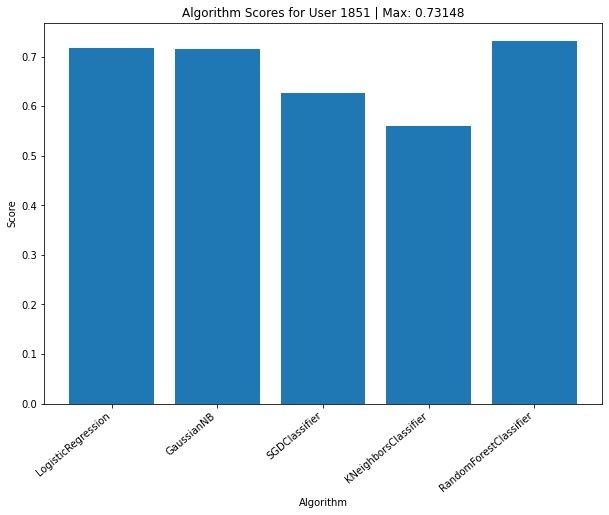

In [50]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10,7))
plt.bar(algo, scores)
plt.ylabel("Score")
plt.xlabel("Algorithm")
plt.title('Algorithm Scores for User ' +str(z)+ ' | Max: '+str(round(max(scores),5)))
plt.xticks(rotation=40, ha="right" )

In [51]:
"""import seaborn as sns
#plt.plot(dfm.correct, dfm.tag1)
ax = sns.regplot(y=dfm.correct, x=dfm.elapsed_time, color="r")"""

'import seaborn as sns\n#plt.plot(dfm.correct, dfm.tag1)\nax = sns.regplot(y=dfm.correct, x=dfm.elapsed_time, color="r")'

In [52]:
"""# EDA
from pandas_profiling import ProfileReport
profile = ProfileReport(dfm, title="Pandas Profiling Report")

profile.to_widgets()
profile.to_notebook_iframe()"""

'# EDA\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(dfm, title="Pandas Profiling Report")\n\nprofile.to_widgets()\nprofile.to_notebook_iframe()'

In [53]:
"""# best performing model per student
perform = { z : round(max(scores),5) }
perform"""

'# best performing model per student\nperform = { z : round(max(scores),5) }\nperform'